# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [11]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [37]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

df = pd.DataFrame(columns=['City','Cloudiness','Country','Date',
                           'Humidity','Lat','Lng','Max Temp','Wind Speed'])

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [38]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"

for city in cities:
    res = requests.get(base_url + "appid=" + api_key +"&units=imperial"+ "&q=" + city).json()
    print(f"Querying {city}...")
    try:
        cloud = res['clouds']['all']
        country = res['sys']['country']
        date = res['dt']
        hum = res['main']['humidity']
        lat = res['coord']['lat']
        lon = res['coord']['lon']
        maxT = res['main']['temp_max']
        speed = res['wind']['speed']
    except:
        print('   Attempt failed')
        continue
    print('   Query Successful')
    df = df.append({'City':city,'Cloudiness':cloud,'Country':country,
                    'Date':date,'Humidity':hum,'Lat':lat,'Lng':lon,
                    'Max Temp':maxT,'Wind Speed':speed},ignore_index=True)

Querying rikitea...
   Query Successful
Querying narsaq...
   Query Successful
Querying saint-philippe...
   Query Successful
Querying sungairaya...
   Query Successful
Querying barrow...
   Query Successful
Querying port elizabeth...
   Query Successful
Querying kargil...
   Query Successful
Querying east london...
   Query Successful
Querying vaini...
   Query Successful
Querying banmo...
   Attempt failed
Querying nikolskoye...
   Query Successful
Querying punta gorda...
   Query Successful
Querying aswan...
   Query Successful
Querying carutapera...
   Query Successful
Querying ushuaia...
   Query Successful
Querying belushya guba...
   Attempt failed
Querying hermanus...
   Query Successful
Querying odweyne...
   Attempt failed
Querying lincoln...
   Query Successful
Querying port hardy...
   Query Successful
Querying albany...
   Query Successful
Querying qaanaaq...
   Query Successful
Querying hilo...
   Query Successful
Querying bengkulu...
   Attempt failed
Querying avarua...


Querying san blas...
   Query Successful
Querying huntsville...
   Query Successful
Querying kenai...
   Query Successful
Querying igarka...
   Query Successful
Querying fairbanks...
   Query Successful
Querying carauari...
   Query Successful
Querying raca...
   Query Successful
Querying xining...
   Query Successful
Querying ostrovnoy...
   Query Successful
Querying evensk...
   Query Successful
Querying tomatlan...
   Query Successful
Querying faya...
   Query Successful
Querying nago...
   Query Successful
Querying novyy urengoy...
   Query Successful
Querying nador...
   Query Successful
Querying clarence town...
   Query Successful
Querying catuday...
   Query Successful
Querying ixtapa...
   Query Successful
Querying nkwerre...
   Query Successful
Querying zhigansk...
   Query Successful
Querying chokurdakh...
   Query Successful
Querying ponta do sol...
   Query Successful
Querying sentyabrskiy...
   Attempt failed
Querying hauterive...
   Query Successful
Querying khatanga...


Querying bilma...
   Query Successful
Querying pandan...
   Query Successful
Querying klaksvik...
   Query Successful
Querying nanortalik...
   Query Successful
Querying atikokan...
   Query Successful
Querying dawei...
   Query Successful
Querying bambous virieux...
   Query Successful
Querying rojhan...
   Query Successful
Querying dali...
   Query Successful
Querying higuey...
   Attempt failed
Querying college...
   Query Successful
Querying ambon...
   Query Successful
Querying funadhoo...
   Query Successful
Querying dakar...
   Query Successful
Querying seoul...
   Query Successful
Querying tiksi...
   Query Successful
Querying nioro...
   Query Successful
Querying petropavlovsk-kamchatskiy...
   Query Successful
Querying conway...
   Query Successful
Querying shushary...
   Query Successful
Querying russell...
   Query Successful
Querying cedral...
   Query Successful
Querying bowen...
   Query Successful
Querying kasongo-lunda...
   Query Successful
Querying rhyl...
   Query S

Querying toliary...
   Attempt failed
Querying fermoy...
   Query Successful
Querying haines junction...
   Query Successful
Querying doclin...
   Query Successful
Querying gannan...
   Query Successful
Querying palaikastron...
   Query Successful
Querying bulgan...
   Query Successful
Querying half moon bay...
   Query Successful
Querying chagda...
   Attempt failed


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,rikitea,100,PF,1562090017,74,-23.12,-134.97,69.59,21.83
1,narsaq,40,GL,1562090089,100,60.91,-46.05,50.00,9.17
2,saint-philippe,1,CA,1562090019,51,45.36,-73.48,84.99,6.93
3,sungairaya,68,ID,1562090257,85,0.70,108.90,82.91,15.39
4,barrow,48,AR,1562090083,45,-38.31,-60.23,49.07,24.07


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [49]:
df.to_csv('Output/Citeis.csv',header=True)

In [50]:
df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,rikitea,100,PF,1562090017,74,-23.12,-134.97,69.59,21.83
1,narsaq,40,GL,1562090089,100,60.91,-46.05,50.00,9.17
2,saint-philippe,1,CA,1562090019,51,45.36,-73.48,84.99,6.93
3,sungairaya,68,ID,1562090257,85,0.70,108.90,82.91,15.39
4,barrow,48,AR,1562090083,45,-38.31,-60.23,49.07,24.07


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

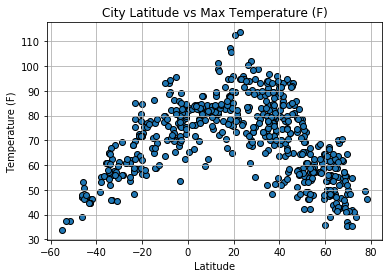

In [57]:
plt.scatter(df['Lat'],df['Max Temp'],edgecolors='black')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title('City Latitude vs Max Temperature (F)')
plt.savefig('Output/LatTemp.png')

#### Latitude vs. Humidity Plot

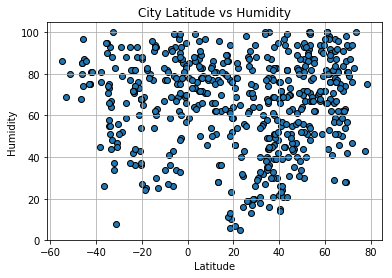

In [59]:
plt.scatter(df['Lat'],df['Humidity'],edgecolors='black')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('City Latitude vs Humidity')
plt.savefig('Output/LatHum.png')

#### Latitude vs. Cloudiness Plot

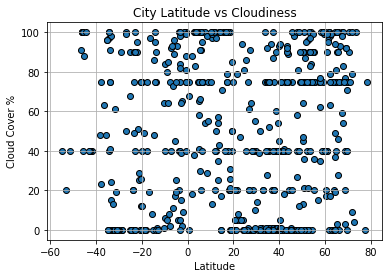

In [60]:
plt.scatter(df['Lat'],df['Cloudiness'],edgecolors='black')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Cloud Cover %')
plt.title('City Latitude vs Cloudiness')
plt.savefig('Output/LatCloud.png')

#### Latitude vs. Wind Speed Plot

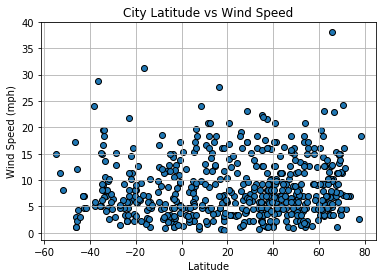

In [61]:
plt.scatter(df['Lat'],df['Wind Speed'],edgecolors='black')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs Wind Speed')
plt.savefig('Output/LatWind.png')